In [89]:
#libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties

In [90]:

# Load your dataset into a DataFrame
df = pd.read_excel(r"C:\Users\Pranav SA\Desktop\E-Sports\MyData\YOUTUBE_FIFA_DATA.xlsx")

data_type = df.dtypes

print(data_type)


# Convert the column to datetime
df['upload_date'] = pd.to_datetime(df['upload_date'])

data_type = df.dtypes

print(data_type)



video_id                object
video_title             object
upload_date             object
view_count               int64
like_count               int64
comment_count            int64
duration               float64
caption                   bool
channel_statistics      object
channel_views            int64
channel_subscribers      int64
video_caption           object
comment_text            object
Channel_Name            object
dtype: object
video_id                       object
video_title                    object
upload_date            datetime64[ns]
view_count                      int64
like_count                      int64
comment_count                   int64
duration                      float64
caption                          bool
channel_statistics             object
channel_views                   int64
channel_subscribers             int64
video_caption                  object
comment_text                   object
Channel_Name                   object
dtype: object


In [91]:
# 1. Among the FIFA 21, FIFA 22 and FIFA 23 which game had most of the views and which had the least views? 
# How does this trend is across all the channels? Specifically, over a specific period.

count_21 = 0
count_22 = 0
count_23 = 0

views_21 = 0
views_22 = 0
views_23 = 0


for key in df['video_title']:
    if 'FIFA 21' in key or 'FIFA21' in key:
        count_21+=1
        views_21 = views_21 + df['view_count'][0]
    elif 'FIFA 22' in key or 'FIFA22' in key:
        count_22+=1
        views_22 = views_22 + df['view_count'][0]
    elif 'FIFA 23' in key or 'FIFA23' in key:
        count_23+=1
        views_23 = views_23 + df['view_count'][0]

for key in df['video_caption']:
    if pd.notnull(key):
        if 'FIFA 21' in key or 'FIFA21' in key:
            count_21+=1
            views_21 = views_21 + df['view_count'][0]
        elif 'FIFA 22' in key or 'FIFA22' in key:
            count_22+=1
            views_22 = views_22 + df['view_count'][0]
        elif 'FIFA 23' in key or 'FIFA23' in key:
            count_23+=1
            views_23 = views_23 + df['view_count'][0]

print(count_21, count_22, count_23)
print(views_21, views_22, views_23)



249 3644 1818
22643811 331381716 165327102


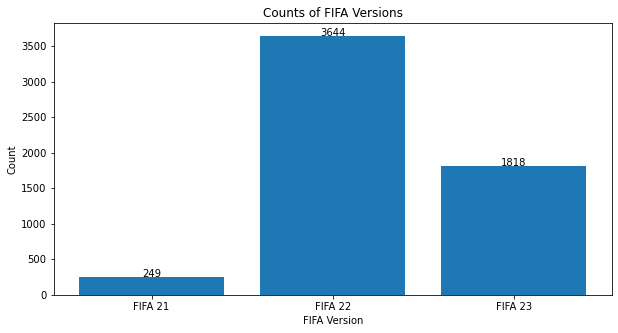

In [92]:
# Set the data
plt.figure(figsize=(10, 5))
labels = ['FIFA 21', 'FIFA 22', 'FIFA 23']
counts = [count_21, count_22, count_23]
views = [views_21, views_22, views_23]

# Create the bar chart
plt.bar(labels, counts)

# Add labels and title
plt.xlabel('FIFA Version')
plt.ylabel('Count')
plt.title('Counts of FIFA Versions')
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, str(count), ha='center')

# Show the chart
plt.show()


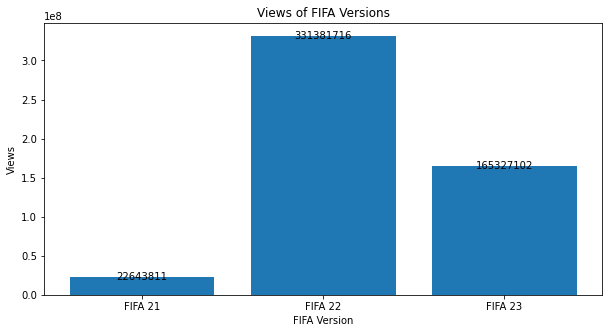

In [93]:


plt.figure(figsize=(10, 5))
# Create the bar chart
plt.bar(labels, views)

# Add labels and title
plt.xlabel('FIFA Version')
plt.ylabel('Views')
plt.title('Views of FIFA Versions')

for i, view in enumerate(views):
    plt.text(i, view + 0.5, str(view), ha='center', va='center')
# Show the chart
plt.show()



In [94]:
# Define the keywords to search for
keywords = ['FIFA 21', 'FIFA 22', 'FIFA 23']

# Create a new column in the DataFrame to store the keyword associated with each row
df['keyword'] = ''

# Iterate over the keywords and update the keyword column for rows where the video_title or video_caption contains the keyword
for keyword in keywords:
    mask = df['video_title'].str.contains(keyword) | df['video_caption'].str.contains(keyword)
    df.loc[mask, 'keyword'] = keyword

# Filter the DataFrame to only include rows where the keyword column is not empty
filtered_df = df[df['keyword'] != '']

# Group the filtered DataFrame by keyword and calculate statistics on the view_count column
grouped_df = filtered_df.groupby('keyword').agg({'view_count': ['mean', 'median', 'max', 'min']})

# Display the resulting DataFrame
print(grouped_df)

            view_count                           
                  mean    median      max     min
keyword                                          
FIFA 21  321677.000000  321677.0   321677  321677
FIFA 22  158971.775441   54641.0  6908703    5651
FIFA 23  130916.275676   62459.0  2434682    1770


,AA9Skillz,AJ3,BFordLancer,Bateson87,DJMaRiio,HecticTKS,La4ty,Manny,Masterbucks,MattHDGamer,NepentheZ,TBJZLPlays,TWOSYNC,ZwebackHD
FIFA 21,0,1,1,0,4,0,238,0,0,4,1,0,0,0
FIFA 22,342,25,176,546,258,574,238,3,105,258,310,24,424,361
FIFA 23,178,31,72,193,154,393,234,7,20,154,122,7,159,94


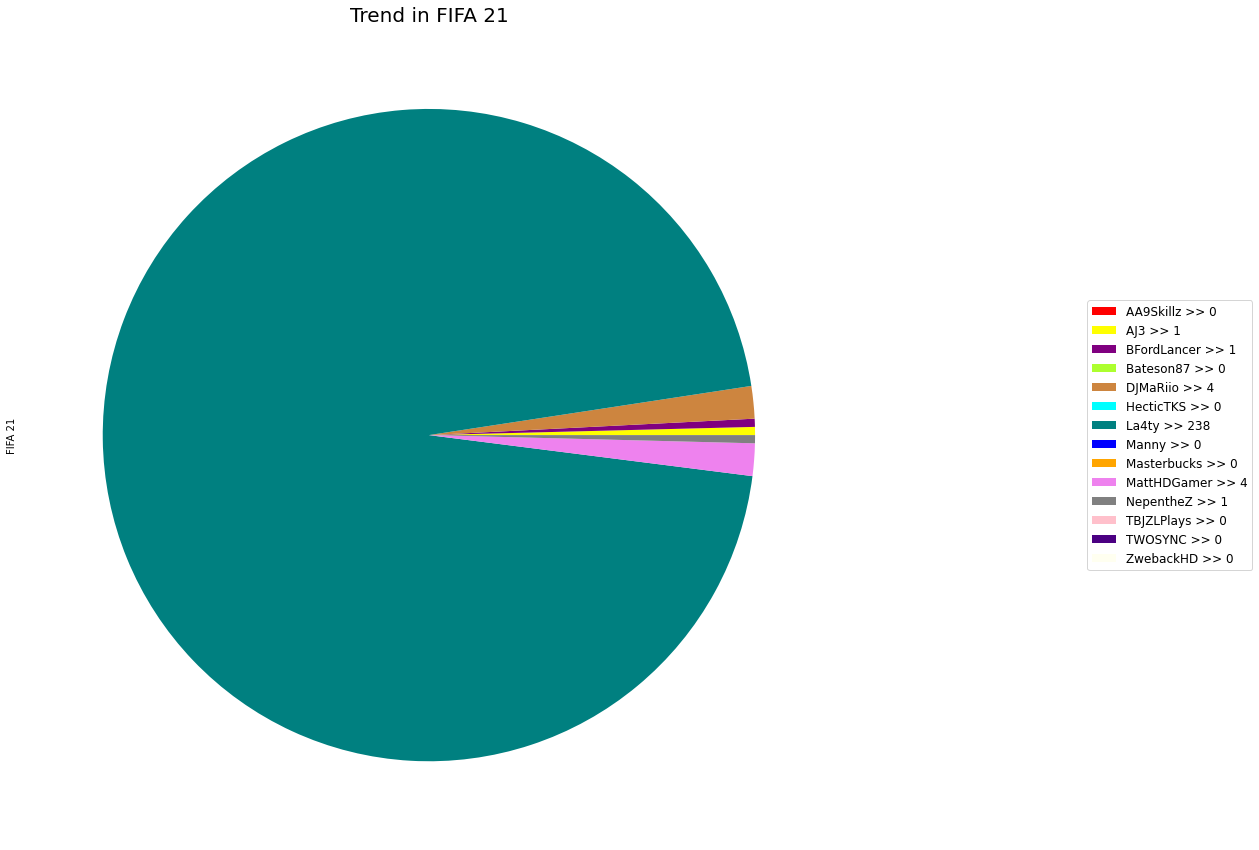

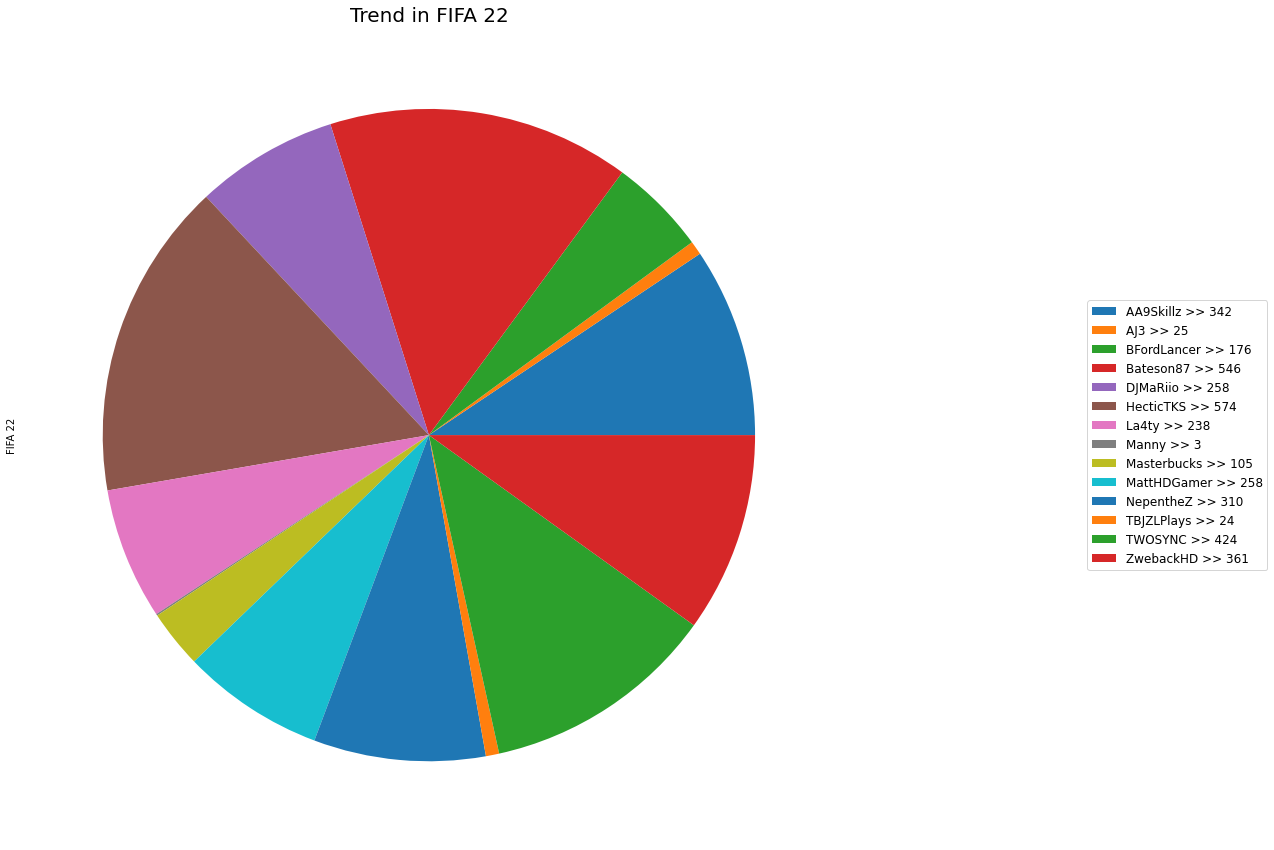

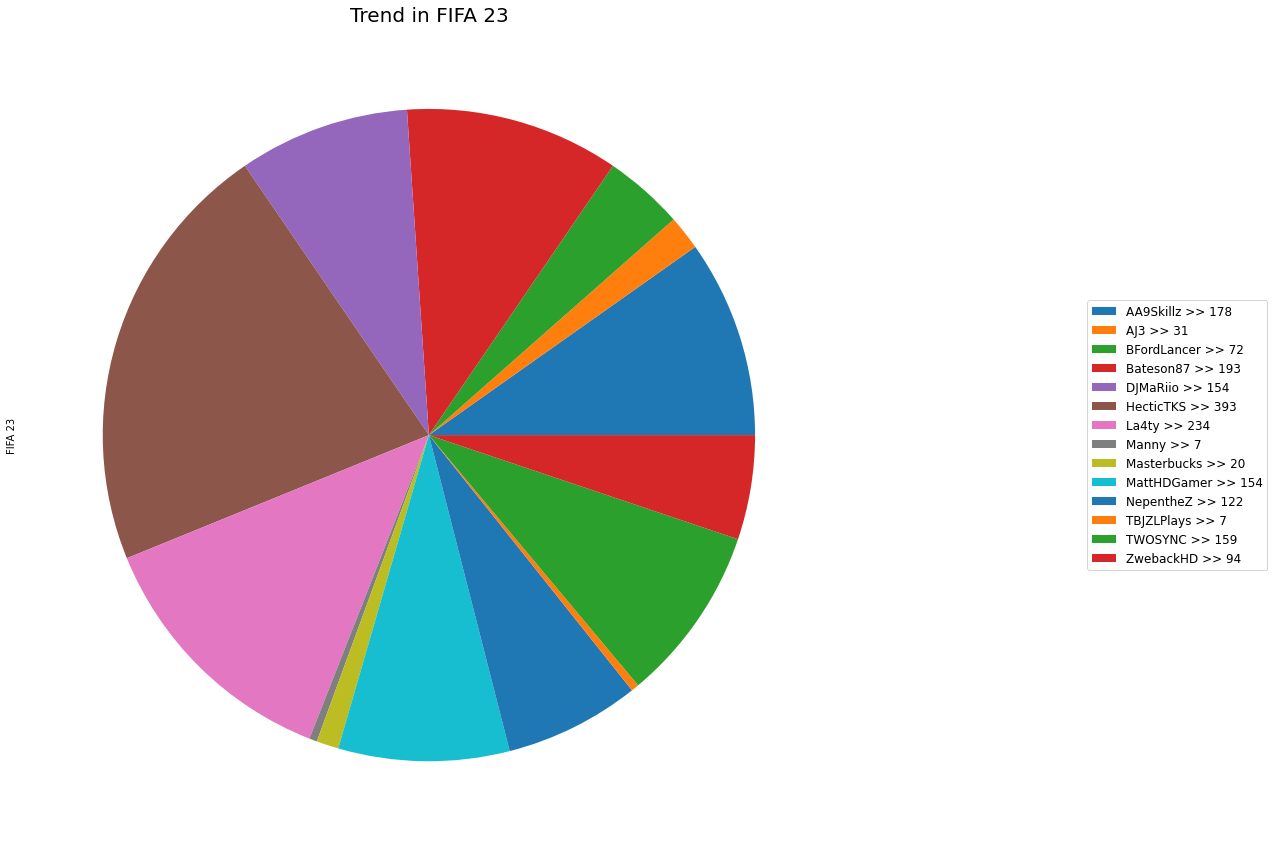

In [95]:
# Group the data by channel name
grouped = df.groupby('Channel_Name')

# Initialize counts for each channel
channel_counts = {}

# Loop over each group
for Channel_Name, group in grouped:
    # Initialize counts for this channel
    chan_21 = 0
    chan_22 = 0
    chan_23 = 0
    
    # Count occurrences of each string in this group
    for key in group['video_title']:
        if pd.notnull(key):
            if 'FIFA 21' in key or 'FIFA21' in key:
                chan_21 += 1
            elif 'FIFA 22' in key or 'FIFA22' in key:
                chan_22 += 1
            elif 'FIFA 23' in key or 'FIFA23' in key:
                chan_23 += 1
    for key in group['video_caption']:
        if pd.notnull(key):
            if 'FIFA 21' in key or 'FIFA21' in key:
                chan_21 += 1
            elif 'FIFA 22' in key or 'FIFA22' in key:
                chan_22 += 1
            elif 'FIFA 23' in key or 'FIFA23' in key:
                chan_23 += 1

    # Store counts for this channel
    channel_counts[Channel_Name] = [chan_21, chan_22, chan_23]

# Create a DataFrame from the channel_counts dictionary
df_counts = pd.DataFrame(channel_counts, index=['FIFA 21', 'FIFA 22', 'FIFA 23'])

# Display the DataFrame
display(df_counts)

colors = ['red', 'yellow', 'purple', 'greenyellow', 'peru', 'cyan', 'teal', 'blue', 'orange', 'violet', 'grey', 'pink', 'indigo', 'ivory', 'forestgreen']


# FIFA 21 trend 

legend_labels = [f'{channel} >> {count}' for channel, count in zip(df_counts.columns, df_counts.loc['FIFA 21'])]
df_counts.loc['FIFA 21'].plot.pie(figsize=(15, 15), labels = None, colors = colors)
plt.title('Trend in FIFA 21', fontsize=20)
plt.legend(labels=legend_labels, loc='center left', bbox_to_anchor=(1.3, 0.5), prop=font)
plt.show()



# FIFA 22 trend 
legend_labels = [f'{channel} >> {count}' for channel, count in zip(df_counts.columns, df_counts.loc['FIFA 22'])]
df_counts.loc['FIFA 22'].plot.pie(figsize=(15, 15), labels = None)
plt.legend(labels=legend_labels, loc='center left', bbox_to_anchor=(1.3, 0.5), prop=font)
plt.title('Trend in FIFA 22', fontsize=20)
plt.show()


# FIFA 23 trend 

legend_labels = [f'{channel} >> {count}' for channel, count in zip(df_counts.columns, df_counts.loc['FIFA 23'])]
df_counts.loc['FIFA 23'].plot.pie(figsize=(15, 15), labels = None)
plt.legend(labels=legend_labels, loc='center left', bbox_to_anchor=(1.3, 0.5), prop=font)
plt.title('Trend in FIFA 23', fontsize=20)
plt.show()